In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)  
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.Series(data.target,name='Target')

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
std=StandardScaler()
X_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [5]:
model=LinearRegression()
model.fit(X_std, y_train)


LinearRegression()

In [6]:
accuracy_test=model.score(X_test_std,y_test)
print("accuracy:",accuracy_test)


accuracy: 0.9468960016420045


In [7]:
svd=np.linalg.svd(X_std, full_matrices=False)
U, S, Vt = svd
print(U)

[[-1.46884027e-01  3.95720775e-02 -7.20981634e-02  1.61980446e-02]
 [-1.18671698e-01  2.47898987e-01 -6.88166794e-03  3.88450859e-02]
 [ 4.96655898e-02  5.03616255e-02  1.18426391e-01  7.56951287e-02]
 [-1.22897098e-01  1.02859704e-02 -1.65951007e-02 -8.51327185e-02]
 [-1.35282008e-01 -4.72943379e-02 -6.43419805e-02 -4.14316608e-02]
 [ 8.65921666e-02 -8.04851250e-02  1.02891086e-02  1.52395192e-01]
 [ 4.21089693e-02  5.71681540e-02  2.38974471e-02  1.04773930e-02]
 [-1.14415115e-01  4.78534025e-02  5.18769632e-02  9.69136432e-03]
 [-1.26212287e-01  5.81970156e-02  4.37668531e-04 -2.04830898e-02]
 [-1.37955638e-01  1.64313952e-01 -8.64181299e-03 -1.47175079e-01]
 [ 6.49821914e-02 -6.39784078e-02 -1.18128513e-01 -1.87969251e-02]
 [ 2.61350362e-02  7.88555988e-02 -1.02085565e-01 -6.40817073e-02]
 [ 5.90740763e-02  5.14807753e-02  9.34706997e-02  3.14815635e-02]
 [-1.16140541e-01  1.36363461e-01  3.46574103e-03  1.28910805e-01]
 [-1.14154151e-01  9.60023104e-02  6.52071955e-02  1.43342469e

In [8]:
print("X_std shape:", X_std.shape)
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

X_std shape: (120, 4)
U shape: (120, 4)
S shape: (4,)
Vt shape: (4, 4)


In [9]:
k = 15
U_k = U[:, :k]                  
S_k = np.diag(S[:k])        
X_svd = np.dot(U_k, S_k)

In [10]:
model=LinearRegression()
model.fit(X_svd, y_train)

LinearRegression()

In [11]:
accuracy=model.score(X_svd,y_train)
print("accuracy:",accuracy)

accuracy: 0.9254199044989622


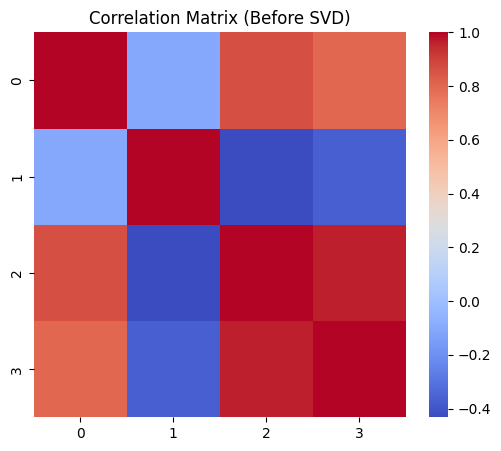

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(np.corrcoef(X_std,rowvar=False), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Before SVD)")
plt.show()

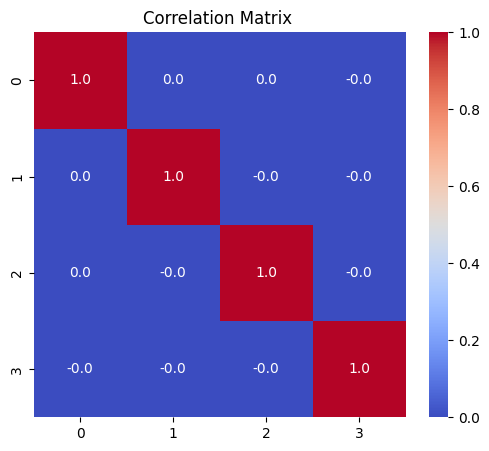

In [13]:


plt.figure(figsize=(6, 5))
sns.heatmap(np.corrcoef(X_svd, rowvar=False), cmap='coolwarm', annot=True,fmt=".1f")
plt.title("Correlation Matrix ")
plt.show()
